In [176]:
import json
import requests

In [177]:
import pandas as pd
import numpy as np

In [178]:
df=pd.read_json("provinces.json",lines=False)
df.head(10)

,txn_date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN
5,2020-01-12,ขอนแก่น,0,0,NaN
6,2020-01-12,จันทบุรี,0,0,NaN
7,2020-01-12,ฉะเชิงเทรา,0,0,NaN
8,2020-01-12,ชลบุรี,0,0,NaN
9,2020-01-12,ชัยนาท,0,0,NaN


In [179]:
df.rename(columns={
    'txn_date':'date'
},inplace = True)

In [180]:
df1=pd.read_json("case_by_province.json",lines=False)
df1

,txn_date,province,new_case,total_case,update_date
0,2021-04-01,กระบี่,0,27,2021-08-19 07:39:31
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
2,2021-04-01,กาญจนบุรี,0,16,2021-08-19 07:39:31
3,2021-04-01,กาฬสินธุ์,0,4,2021-08-19 07:39:31
4,2021-04-01,กำแพงเพชร,0,2,2021-08-19 07:39:31
...,...,...,...,...,...
11071,2021-08-20,เพชรบูรณ์,166,4474,2021-08-20 07:39:03
11072,2021-08-20,เลย,41,2273,2021-08-20 07:39:03
11073,2021-08-20,แพร่,31,1229,2021-08-20 07:39:03
11074,2021-08-20,แม่ฮ่องสอน,1,256,2021-08-20 07:39:03


In [181]:
df1.rename(columns={
    'txn_date':'date'
},inplace = True)

In [182]:
frames = [df, df1]
result = pd.concat(frames)

In [183]:
result

,date,province,new_case,total_case,update_date
0,2020-01-12,กระบี่,0,0,NaN
1,2020-01-12,กรุงเทพมหานคร,1,1,NaN
2,2020-01-12,กาญจนบุรี,0,0,NaN
3,2020-01-12,กาฬสินธุ์,0,0,NaN
4,2020-01-12,กำแพงเพชร,0,0,NaN
...,...,...,...,...,...
11071,2021-08-20,เพชรบูรณ์,166,4474,2021-08-20 07:39:03
11072,2021-08-20,เลย,41,2273,2021-08-20 07:39:03
11073,2021-08-20,แพร่,31,1229,2021-08-20 07:39:03
11074,2021-08-20,แม่ฮ่องสอน,1,256,2021-08-20 07:39:03


In [185]:
daily_case = result.groupby('date').sum()
daily_case

,new_case,total_case
date,,
2020-01-12,1,1
2020-01-17,1,2
2020-01-22,2,4
2020-01-24,1,5
2020-01-25,1,6
...,...,...
2021-08-16,21157,928314
2021-08-17,20128,948442
2021-08-18,20515,968957


In [186]:
import matplotlib.pyplot as plt

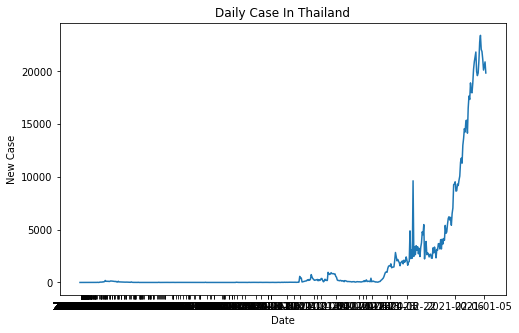

In [187]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set(xlabel="Date",
       ylabel="New Case",
       title="Daily Case In Thailand")
plt.xticks( daily_case['new_case'], daily_case.index.values)
plt.plot( daily_case['new_case'] )
plt.show()

In [188]:
group_province = result.groupby('province')
group_province.first()

,date,new_case,total_case,update_date
province,,,,
กระบี่,2020-01-12,0,0,2021-08-19 07:39:31
กรุงเทพมหานคร,2020-01-12,1,1,2021-08-19 07:39:31
กาญจนบุรี,2020-01-12,0,0,2021-08-19 07:39:31
กาฬสินธุ์,2020-01-12,0,0,2021-08-19 07:39:31
กำแพงเพชร,2020-01-12,0,0,2021-08-19 07:39:31
...,...,...,...,...
เพชรบูรณ์,2020-01-12,0,0,2021-08-19 07:39:31
เลย,2020-01-12,0,0,2021-08-19 07:39:31
แพร่,2020-01-12,0,0,2021-08-19 07:39:31


In [189]:
bangkok = group_province.get_group('กรุงเทพมหานคร')

In [190]:
bangkok

,date,new_case,total_case,update_date
1,2020-01-12,1,1,NaN
79,2020-01-17,1,2,NaN
157,2020-01-22,1,3,NaN
235,2020-01-24,0,3,NaN
313,2020-01-25,1,4,NaN
...,...,...,...,...
10687,2021-08-16,4337,245126,2021-08-19 07:39:31
10765,2021-08-17,4404,249530,2021-08-19 07:39:31
10843,2021-08-18,4165,253695,2021-08-19 07:39:31
10921,2021-08-19,4410,258105,2021-08-19 07:39:31


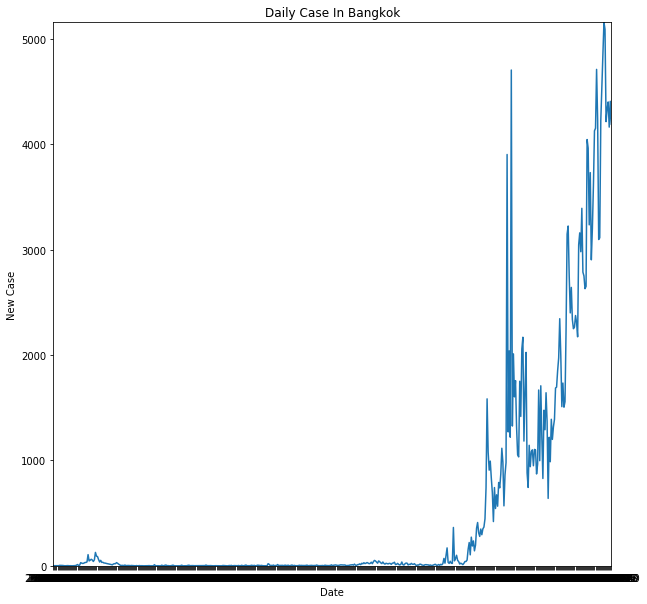

In [192]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(xlabel="Date",
       ylabel="New Case",
       title="Daily Case In Bangkok")
plt.plot( bangkok['date'], bangkok['new_case'] )
ax.autoscale(tight=True)
plt.show()

In [216]:
thailand_2021 = result[result['date']>'2021-03-31']
daily_2021 = thailand_2021.groupby('date').sum()
daily_2021

,new_case,total_case
date,,
2021-04-01,26,28889
2021-04-02,58,28947
2021-04-03,84,29031
2021-04-04,96,29127
2021-04-05,194,29321
...,...,...
2021-08-16,21157,928314
2021-08-17,20128,948442
2021-08-18,20515,968957


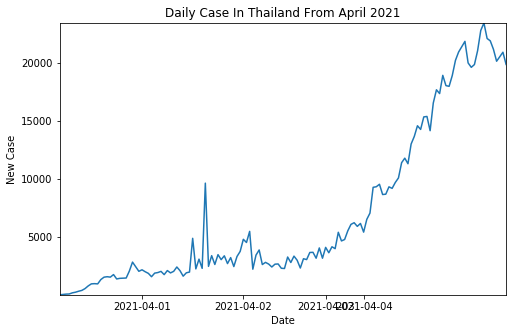

In [217]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set(xlabel="Date",
       ylabel="New Case",
       title="Daily Case In Thailand From April 2021")
plt.xticks( daily_2021['new_case'], daily_2021.index.values)
plt.plot( daily_2021['new_case'] )
ax.autoscale(tight=True)
plt.show()

In [218]:
daily_2021 = thailand_2021.groupby('province')
bangkok_2021 = daily_2021.get_group('กรุงเทพมหานคร')
bangkok_2021

,date,province,new_case,total_case,update_date
1,2021-04-01,กรุงเทพมหานคร,11,4855,2021-08-19 07:39:31
79,2021-04-02,กรุงเทพมหานคร,24,4879,2021-08-19 07:39:31
157,2021-04-03,กรุงเทพมหานคร,41,4920,2021-08-19 07:39:31
235,2021-04-04,กรุงเทพมหานคร,41,4961,2021-08-19 07:39:31
313,2021-04-05,กรุงเทพมหานคร,55,5016,2021-08-19 07:39:31
...,...,...,...,...,...
10687,2021-08-16,กรุงเทพมหานคร,4337,245126,2021-08-19 07:39:31
10765,2021-08-17,กรุงเทพมหานคร,4404,249530,2021-08-19 07:39:31
10843,2021-08-18,กรุงเทพมหานคร,4165,253695,2021-08-19 07:39:31
10921,2021-08-19,กรุงเทพมหานคร,4410,258105,2021-08-19 07:39:31


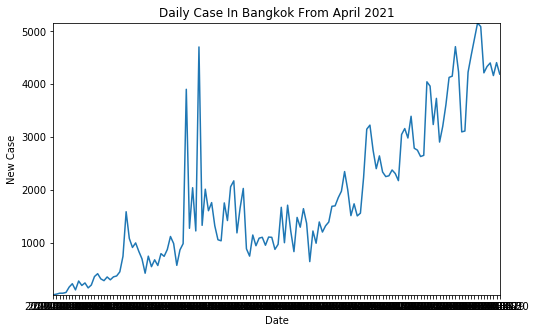

In [219]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set(xlabel="Date",
       ylabel="New Case",
       title="Daily Case In Bangkok From April 2021")
plt.plot( bangkok_2021['date'], bangkok_2021['new_case'] )
ax.autoscale(tight=True)
plt.show()